In [1]:
import numpy as np
from torch.utils.data import DataLoader

from networks.model import MyModel
from utils.dataset import get_loader
from utils.common import seed_torch

## Setup general parameters

In [2]:
setup = {
    'dataset_dir': '/home/filip/Projekty/ML/datasets/processed/mindboggle_84_Nx192x256_lateral_ventricle',
    'struct': 'lateral_ventricle',
    'epochs': 10,
    'batch_size': 16,
    'seed': 5
}

## Setup model parameters

In [3]:
models = [
    {
        'arch': 'Unet', 'filters': 16, 'lr': 1e-3,
        'loss_fn': 'bce'
    },
    {
        'arch': 'Unet', 'filters': 16, 'lr': 1e-3,
        'loss_fn': 'weighted_bce'
    },
    {
        'arch': 'Unet', 'filters': 16, 'lr': 1e-3,
        'loss_fn': 'dice'
    },
    {
        'arch': 'Unet', 'filters': 16, 'lr': 1e-3,
        'loss_fn': 'surface'
    }
]

## Set the seed for deterministic results

In [4]:
seed_torch(10)

## Create train / validation loaders

In [5]:
dataset_dir = setup['dataset_dir']
train_loader = get_loader(dataset_dir, 'train', shuffle = True)
valid_loader = get_loader(dataset_dir, 'valid', shuffle = False)

## For each model setup perform training

In [6]:
model_history = dict()

In [7]:
for model in models:
    my_model = MyModel(struct = setup['struct'])

    history = my_model.train(
        arch = model['arch'],
        epochs = setup['epochs'],
        train_loader = train_loader,
        valid_loader = valid_loader,
        n_filters = model['filters'],
        loss_name = model['loss_fn'],
        learning_rate = model['lr']
    )

    print(history)
    
    model_history[model['loss_fn']] = history

Device: cuda
---------------------------------------------------
Epoch 1 / 10
Time per epoch: 52.881 seconds
---
Train. loss: 0.8711300089761809
Valid. loss: 0.8563544872479562
---
Train. dice: 0.9793387113453506
Valid. dice: 0.9829799211942233
---
False positive rate: 11%
False negative rate: 100%
---------------------------------------------------
Epoch 2 / 10
Time per epoch: 52.153 seconds
---
Train. loss: 0.7566444614490906
Valid. loss: 0.7259183694154788
---
Train. dice: 0.9775496910918843
Valid. dice: 0.9746280052723029
---
False positive rate: 0%
False negative rate: 100%
---------------------------------------------------
Epoch 3 / 10
Time per epoch: 52.341 seconds
---
Train. loss: 0.715810328334957
Valid. loss: 0.7084137934904832
---
Train. dice: 0.9366200748202088
Valid. dice: 0.8649433576143705
---
False positive rate: 0%
False negative rate: 60%
---------------------------------------------------
Epoch 4 / 10
Time per epoch: 52.438 seconds
---
Train. loss: 0.703134549515588

Time per epoch: 51.914 seconds
---
Train. loss: 0.6763662494622268
Valid. loss: 0.7010638347038856
---
Train. dice: 0.6763662494622268
Valid. dice: 0.7010638347038856
---
False positive rate: 3%
False negative rate: 2%
---------------------------------------------------
Epoch 3 / 10
Time per epoch: 51.932 seconds
---
Train. loss: 0.1873018443584442
Valid. loss: 0.13716836617543146
---
Train. dice: 0.1873018443584442
Valid. dice: 0.13716836617543146
---
False positive rate: 0%
False negative rate: 11%
---------------------------------------------------
Epoch 4 / 10
Time per epoch: 52.157 seconds
---
Train. loss: 0.10517953162069445
Valid. loss: 0.10566729918504372
---
Train. dice: 0.10517953162069445
Valid. dice: 0.10566729918504372
---
False positive rate: 0%
False negative rate: 8%
---------------------------------------------------
Epoch 5 / 10
Time per epoch: 51.872 seconds
---
Train. loss: 0.0880034240809354
Valid. loss: 0.08973486912556183
---
Train. dice: 0.0880034240809354
Valid

In [8]:
model_history

{'bce': {'losses': [0.8711300089761809,
   0.7566444614490906,
   0.715810328334957,
   0.703134549515588,
   0.6976857719483314,
   0.6949711627774424,
   0.6935185379796214,
   0.6925658753940037,
   0.692020412002291,
   0.691655755430073],
  'val_losses': [0.8563544872479562,
   0.7259183694154788,
   0.7084137934904832,
   0.699734050493974,
   0.6962949603031843,
   0.694087931743035,
   0.6930371415920746,
   0.6921167939137189,
   0.6918580684906397,
   0.691529951034448],
  'dices': [0.9793387113453506,
   0.9775496910918843,
   0.9366200748202088,
   0.790543485771526,
   0.5913376765591758,
   0.45776735575168165,
   0.37028360869977384,
   0.3008502365706803,
   0.2550885158699828,
   0.22085535061823858],
  'val_dices': [0.9829799211942233,
   0.9746280052723029,
   0.8649433576143705,
   0.7460992779487219,
   0.5307449178817945,
   0.42085327551915097,
   0.35776799305891377,
   0.2908005790832715,
   0.28992468882829714,
   0.21938225550529283],
  'fp_rate': ['11%', '0%

### Loss / Validation loss

In [11]:
import matplotlib
import matplotlib.pyplot as plt

In [17]:
epochs = np.arange(setup['epochs'])

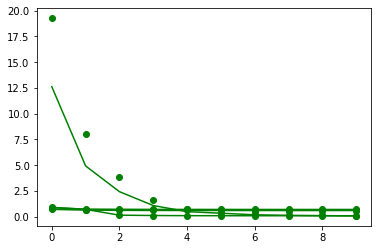

In [22]:
for model in models:
    plt.plot(epochs, model_history[model['loss_fn']]['losses'], 'o', color='green')
    plt.plot(epochs, model_history[model['loss_fn']]['val_losses'], color='green')

plt.show()

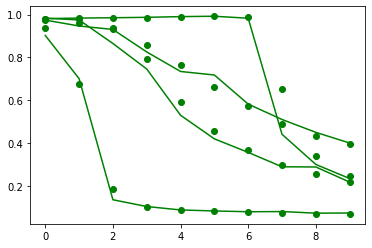

In [26]:
for model in models:
    plt.plot(epochs, model_history[model['loss_fn']]['dices'], 'o', color='green')
    plt.plot(epochs, model_history[model['loss_fn']]['val_dices'], color='green')

plt.show()